In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler

In [195]:
# Load the datasets
data_path = '../data/processed/data.csv'
medals_path = '../data/processed/medals.csv'

data_df = pd.read_csv(data_path)
medals_df = pd.read_csv(medals_path)
display(medals_df.head(7))
display(data_df.head(7))

,Year,Country,gold_medal,silver_medal,bronze_medal,total_medal,type_olympic,host_flag
0,1924,AUT,3,1,0,4,w,0
1,1924,BEL,0,0,1,1,w,0
2,1924,CAN,1,0,0,1,w,0
3,1924,FIN,4,5,3,12,w,0
4,1924,FRA,0,0,4,4,w,1
5,1924,GBR,1,1,2,4,w,0
6,1924,NOR,4,7,6,17,w,0


,Country Code,Year,AG.LND.TOTL.K2,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EN.ATM.CO2E.PC,IT.CEL.SETS.P2,IT.NET.USER.ZS,NY.ADJ.DRES.GN.ZS,NY.ADJ.SVNX.GN.ZS,...,SL.EMP.TOTL.SP.ZS,SL.TLF.ACTI.ZS,SL.UEM.TOTL.ZS,SP.DYN.LE00.IN,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL.IN.ZS,Region,Income Group
0,ABW,2020,180.0,28.8,100.0,0.268359,132.288784,97.170000,0.003119,-2.678666,...,42.472,48.449,10.100,75.723,0.134255,106585.0,56.303,43.697,Latin America & Caribbean,High income
1,ABW,2022,180.0,28.8,99.9,0.268359,132.349628,97.170000,0.002129,7.063151,...,42.472,48.449,10.100,74.992,-0.086392,106445.0,55.948,44.052,Latin America & Caribbean,High income
2,AFG,2020,652230.0,33.8,97.7,0.223479,58.190214,18.400000,0.243668,7.063151,...,36.711,42.609,11.710,62.575,3.134747,38972230.0,73.974,26.026,South Asia,Low income
3,AFG,2022,652230.0,36.1,85.3,0.223479,56.554435,18.400000,0.335935,7.063151,...,32.333,38.500,14.100,62.879,2.534498,41128771.0,73.384,26.616,South Asia,Low income
4,AGO,2020,1246700.0,49.7,47.0,0.592743,43.810091,32.550147,16.463536,9.717946,...,62.550,76.009,16.676,62.261,3.268348,33428486.0,33.175,66.825,Sub-Saharan Africa,Lower middle income
5,AGO,2022,1246700.0,50.0,48.5,0.592743,67.373474,32.602302,23.269683,14.040853,...,64.447,76.156,14.693,61.929,3.096753,35588987.0,31.919,68.081,Sub-Saharan Africa,Lower middle income
6,ALB,2020,27400.0,83.1,100.0,1.544550,91.350501,72.237677,0.498448,-2.355145,...,50.001,67.363,12.790,76.989,-0.574207,2837849.0,37.888,62.112,Europe & Central Asia,Upper middle income


In [196]:
summary_statistics = medals_df.describe(include='all')
summary_statistics

,Year,Country,gold_medal,silver_medal,bronze_medal,total_medal,type_olympic,host_flag
count,1774.000000,1774,1774.000000,1774.000000,1774.000000,1774.000000,1774,1774.000000
unique,NaN,156,NaN,NaN,NaN,NaN,2,NaN
top,NaN,USA,NaN,NaN,NaN,NaN,s,NaN
freq,NaN,52,NaN,NaN,NaN,NaN,1336,NaN
mean,1980.706877,NaN,3.763247,3.746336,3.991545,11.501127,NaN,0.036077
std,32.026547,NaN,7.589755,6.414778,6.111803,19.389229,NaN,0.186534
min,1896.000000,NaN,0.000000,0.000000,0.000000,1.000000,NaN,0.000000
25%,1960.000000,NaN,0.000000,1.000000,1.000000,2.000000,NaN,0.000000
50%,1988.000000,NaN,1.000000,2.000000,2.000000,5.000000,NaN,0.000000
75%,2008.000000,NaN,4.000000,4.000000,5.000000,13.000000,NaN,0.000000


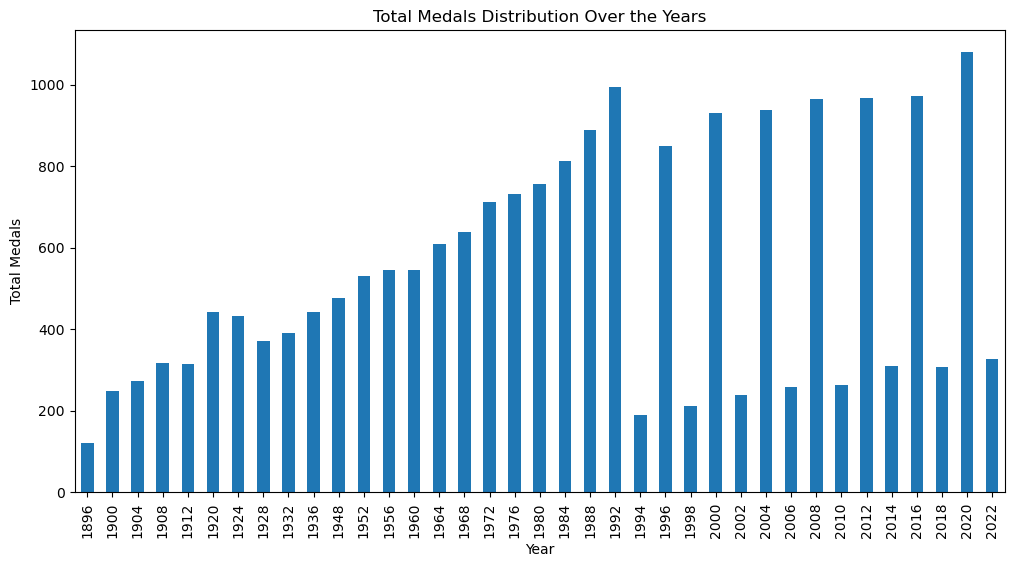

In [197]:
plt.figure(figsize=(12, 6))
medals_df.groupby('Year')['total_medal'].sum().plot(kind='bar')
plt.title('Total Medals Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.show()

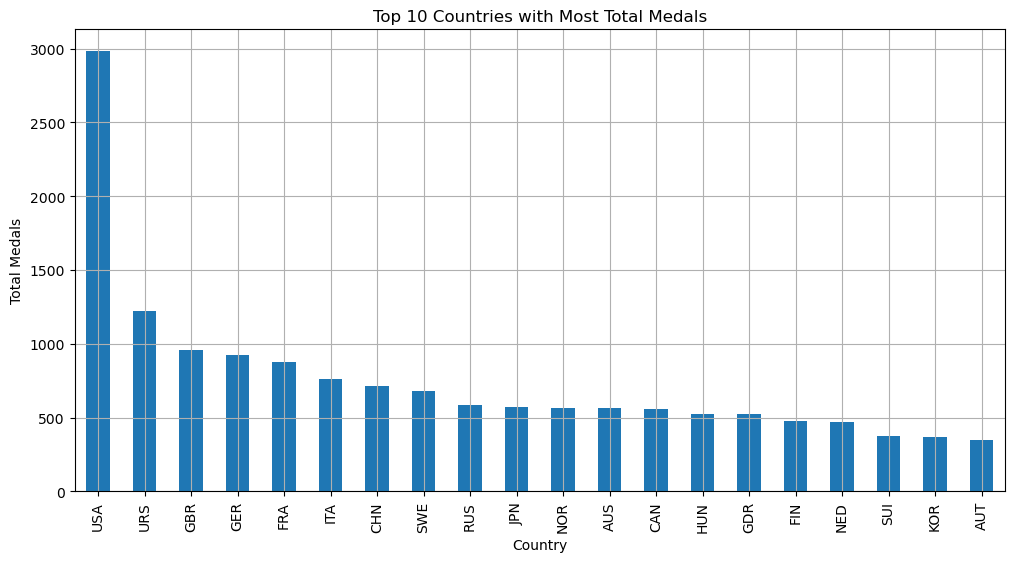

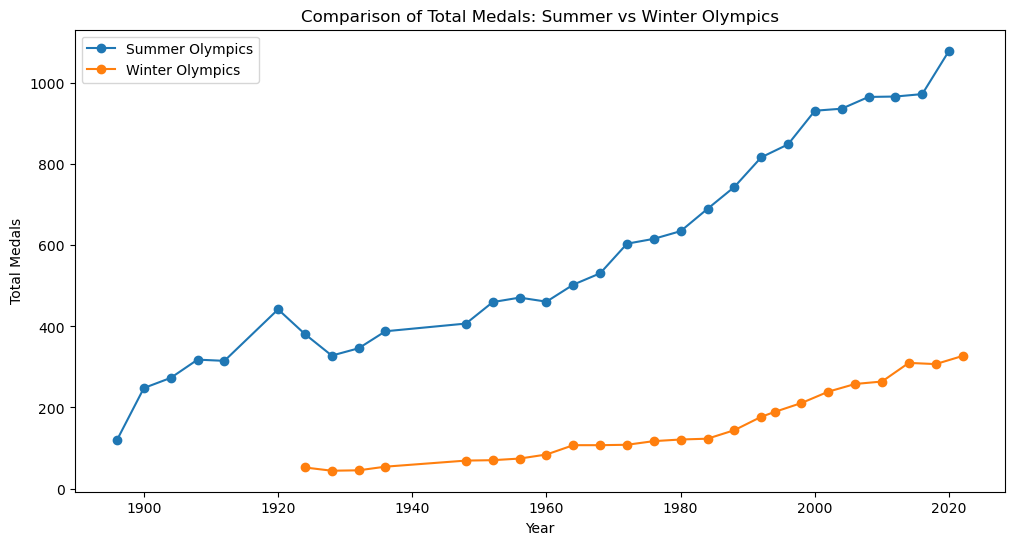

In [198]:
top_countries = medals_df.groupby('Country')['total_medal'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar',grid=True)
plt.title('Top 10 Countries with Most Total Medals')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.show()

# Comparison of medals between Summer and Winter Olympics
summer_medals = medals_df[medals_df['type_olympic'] == 's'].groupby('Year')['total_medal'].sum()
winter_medals = medals_df[medals_df['type_olympic'] == 'w'].groupby('Year')['total_medal'].sum()

plt.figure(figsize=(12, 6))
plt.plot(summer_medals.index, summer_medals.values, label='Summer Olympics', marker='o')
plt.plot(winter_medals.index, winter_medals.values, label='Winter Olympics', marker='o')
plt.title('Comparison of Total Medals: Summer vs Winter Olympics')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend()
plt.show()



In [199]:
combined_medal = medals_df[medals_df['Year']>=2020]


# Calculate summary statistics for historical information
summary_stats = medals_df.groupby(['Country']).agg({
    'gold_medal': ['sum', 'mean'],
    'silver_medal': ['sum', 'mean'],
    'bronze_medal': ['sum', 'mean'],
    'total_medal': ['sum', 'mean'],
    'host_flag': 'sum'
}).reset_index()

# Flatten the MultiIndex columns
summary_stats.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in summary_stats.columns]

# Merge the filtered dataframe with the summary statistics
merged_df = combined_medal.merge(summary_stats, left_on='Country', right_on='Country_', how='left')


merged_df.head()

,Year,Country,gold_medal,silver_medal,bronze_medal,total_medal,type_olympic,host_flag,Country_,gold_medal_sum,gold_medal_mean,silver_medal_sum,silver_medal_mean,bronze_medal_sum,bronze_medal_mean,total_medal_sum,total_medal_mean,host_flag_sum
0,2022,AUS,1,2,1,4,w,0,AUS,172,5.058824,178,5.235294,214,6.294118,564,16.588235,2
1,2022,AUT,7,7,4,18,w,0,AUT,92,1.840000,124,2.480000,133,2.660000,349,6.980000,3
2,2022,BEL,1,0,1,2,w,0,BEL,45,1.406250,57,1.781250,62,1.937500,164,5.125000,1
3,2022,BLR,0,2,0,2,w,0,BLR,23,1.533333,39,2.600000,51,3.400000,113,7.533333,0
4,2022,CAN,4,8,14,26,w,0,CAN,150,2.941176,185,3.627451,225,4.411765,560,10.980392,3


In [200]:
merged_data = pd.merge(merged_df, data_df, left_on=['Year', 'Country'], right_on=['Year', 'Country Code'], how='left')

In [201]:
data = merged_data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 121
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               103 non-null    int64  
 1   Country            103 non-null    object 
 2   gold_medal         103 non-null    int64  
 3   silver_medal       103 non-null    int64  
 4   bronze_medal       103 non-null    int64  
 5   total_medal        103 non-null    int64  
 6   type_olympic       103 non-null    object 
 7   host_flag          103 non-null    int64  
 8   Country_           103 non-null    object 
 9   gold_medal_sum     103 non-null    int64  
 10  gold_medal_mean    103 non-null    float64
 11  silver_medal_sum   103 non-null    int64  
 12  silver_medal_mean  103 non-null    float64
 13  bronze_medal_sum   103 non-null    int64  
 14  bronze_medal_mean  103 non-null    float64
 15  total_medal_sum    103 non-null    int64  
 16  total_medal_mean   103 non

In [202]:
data.to_csv('../data/processed/merged_data.csv',index=False)


In [203]:
#merged_data[merged_data['Country']!=merged_data['Country Code']]['Country'].value_counts()

In [204]:
# Generate summary statistics for numerical columns
summary_statistics = data.describe()

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display summary statistics and missing values
summary_statistics

,Year,gold_medal,silver_medal,bronze_medal,total_medal,host_flag,gold_medal_sum,gold_medal_mean,silver_medal_sum,silver_medal_mean,...,SE.TER.ENRR,SH.XPD.CHEX.GD.ZS,SL.EMP.TOTL.SP.ZS,SL.TLF.ACTI.ZS,SL.UEM.TOTL.ZS,SP.DYN.LE00.IN,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL.IN.ZS
count,103.000000,103.000000,103.000000,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02,103.00000,103.00000
mean,2020.543689,3.970874,3.815534,4.38835,12.174757,0.019417,97.621359,2.900048,96.097087,2.964072,...,65.152985,8.413488,56.622942,71.389466,6.472786,76.809447,0.377524,7.582217e+07,28.64832,71.35168
std,0.894172,6.698634,5.928905,5.78916,17.511580,0.138662,178.500844,3.928396,152.304166,3.266022,...,24.165817,2.991997,8.481169,9.606445,4.024895,5.711974,1.780455,2.381699e+08,17.02719,17.02719
min,2020.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.142857,...,4.756000,2.393345,31.075000,38.632000,0.140000,59.032000,-14.316543,3.400700e+04,0.00000,21.69500
25%,2020.000000,0.500000,1.000000,1.00000,2.000000,0.000000,6.000000,0.651515,7.500000,0.875000,...,52.901020,6.320000,52.180000,67.425000,3.837500,72.827000,-0.201277,5.542824e+06,16.21650,58.61500
50%,2020.000000,2.000000,2.000000,2.00000,6.000000,0.000000,29.000000,1.687500,36.000000,2.083333,...,70.721001,8.358896,57.685000,72.765000,5.293000,77.567000,0.430997,1.153860e+07,25.93900,74.06100
75%,2022.000000,4.000000,5.000000,5.00000,15.000000,0.000000,146.500000,3.799362,154.000000,3.895833,...,80.817101,10.711888,61.540000,78.307500,7.916500,81.706098,1.064856,4.935450e+07,41.38500,83.78350
max,2022.000000,39.000000,41.000000,33.00000,113.000000,1.000000,1178.000000,22.653846,960.000000,18.461538,...,118.883682,18.756220,87.493000,88.494000,20.966000,85.496341,3.332809,1.412175e+09,78.30500,100.00000


/var/folders/mz/ry3t45m14wz2fbn7ln93113h0000gn/T/ipykernel_14820/1705472990.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


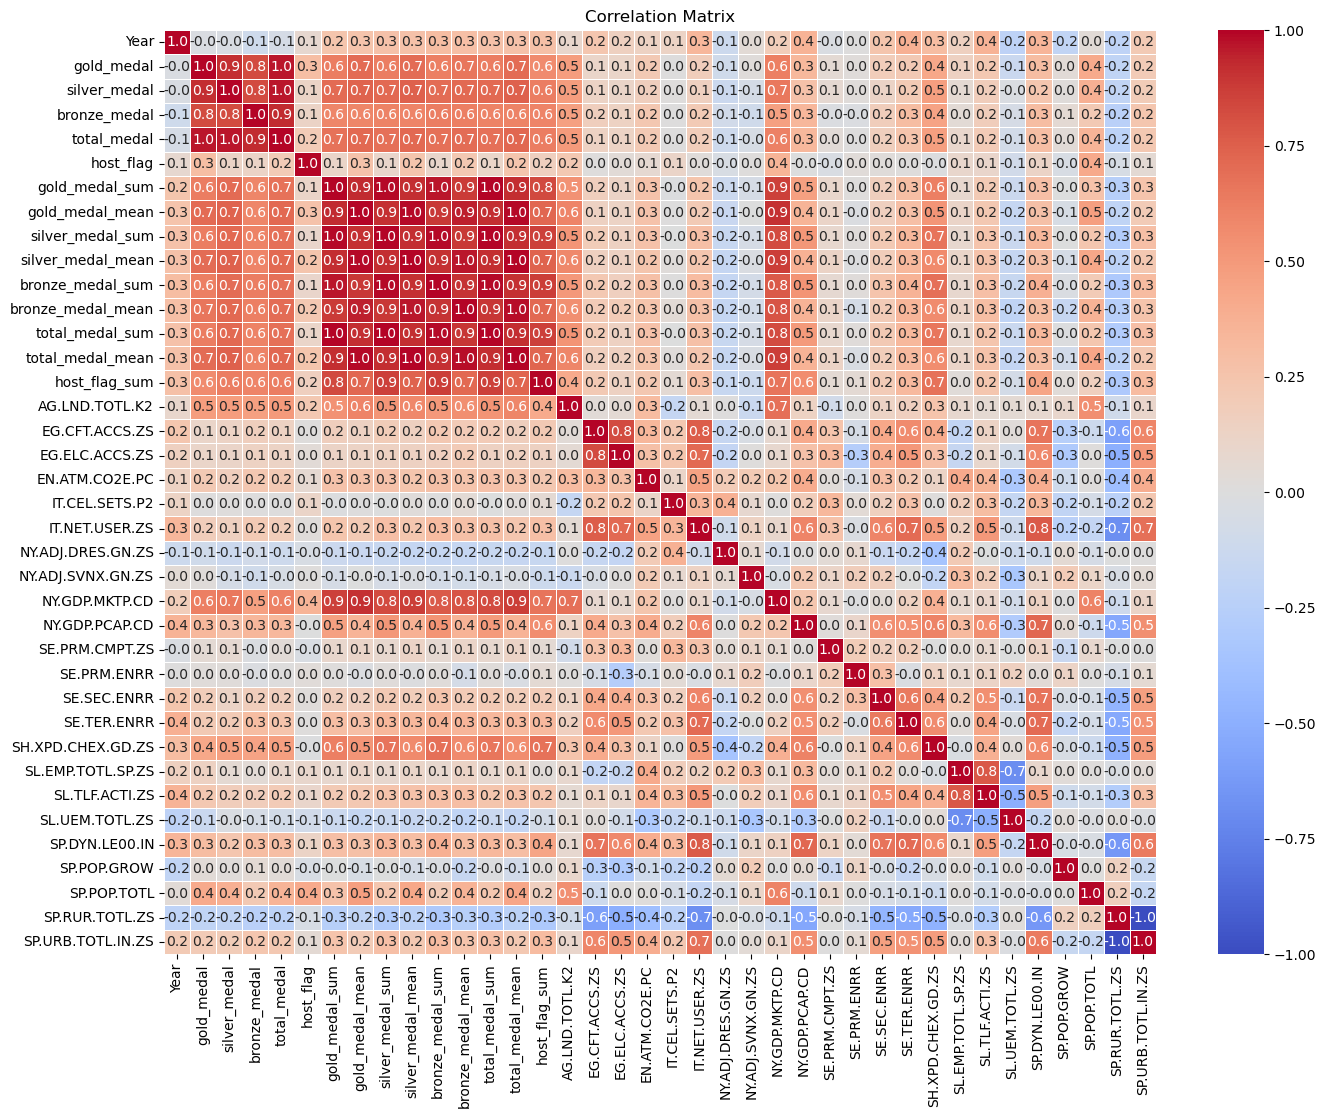

In [205]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


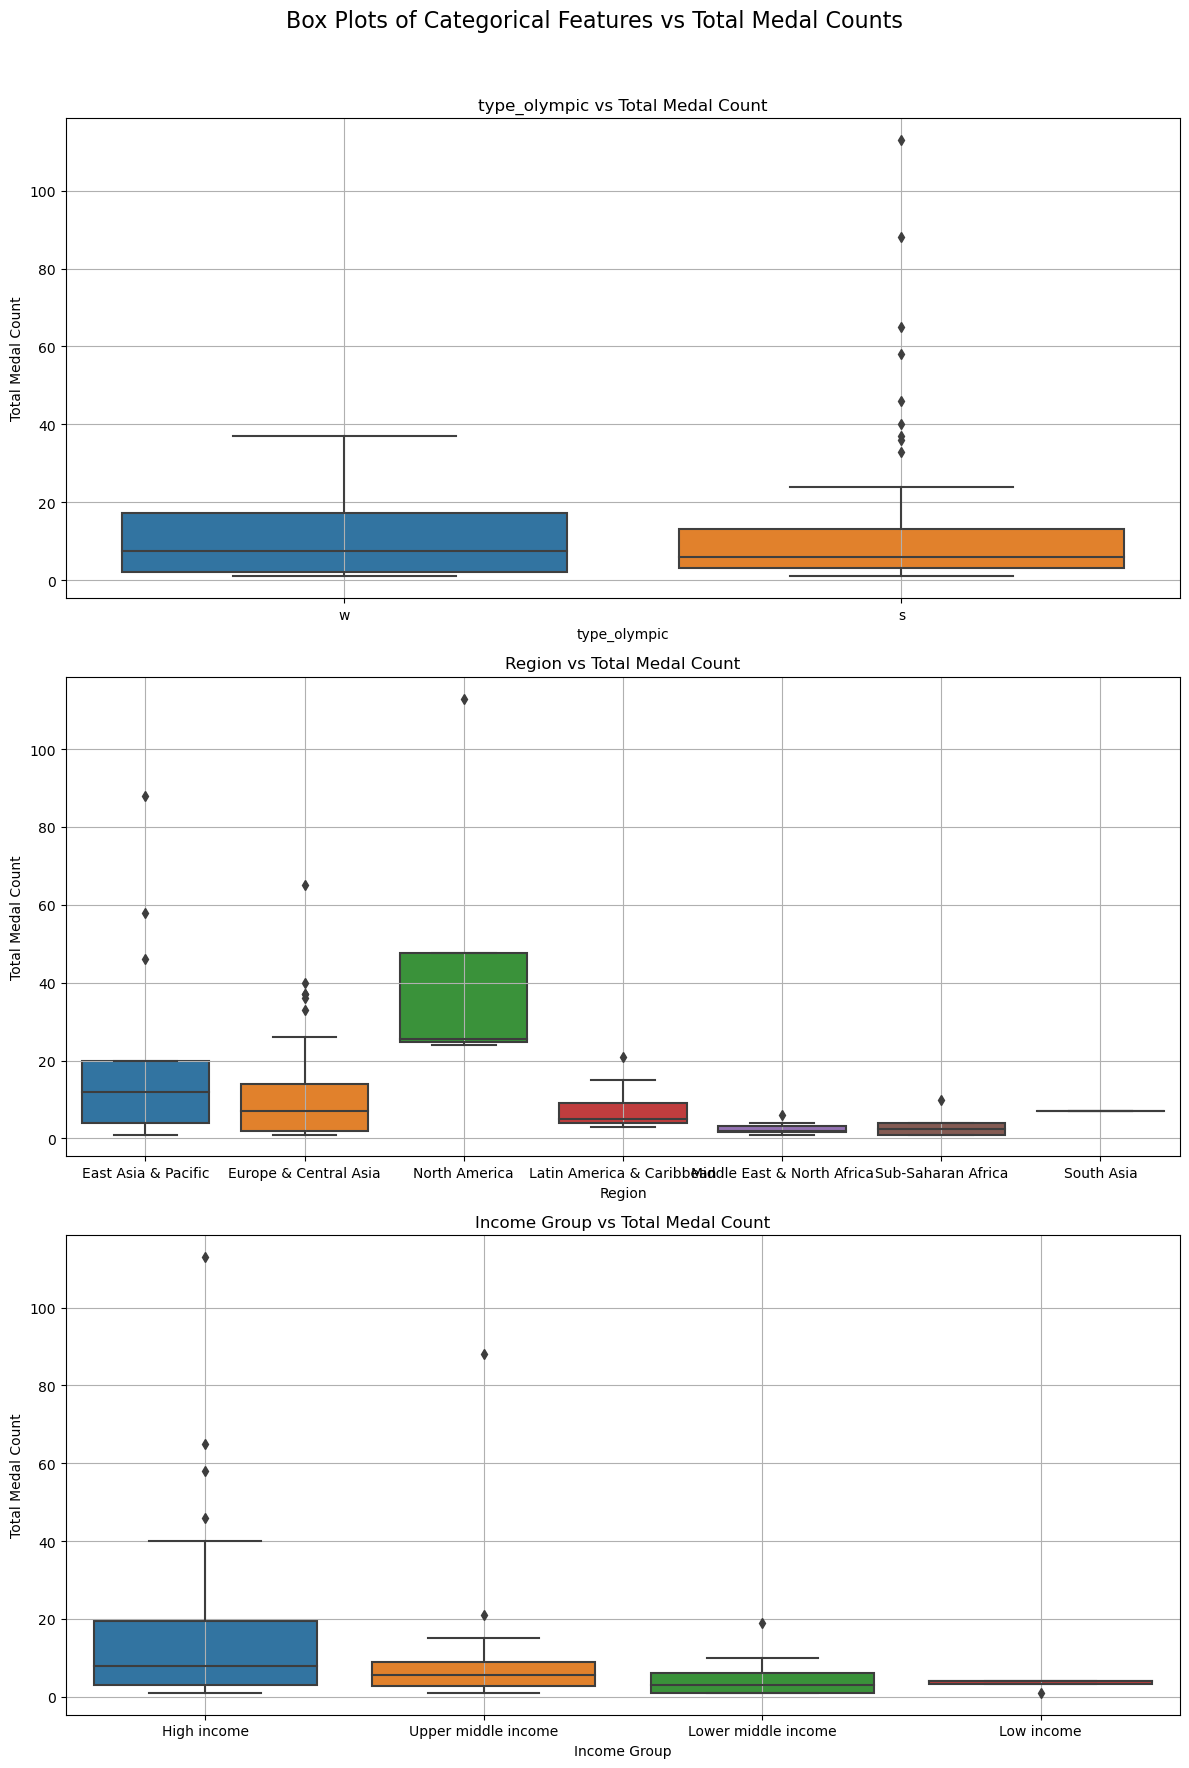

In [206]:
# Box plots for categorical features vs total medal counts
categorical_features = ['type_olympic', 'Region', 'Income Group']

fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(12, 18))
fig.suptitle('Box Plots of Categorical Features vs Total Medal Counts', fontsize=16)
for i, feature in enumerate(categorical_features):
    sns.boxplot(x=data[feature], y=data['total_medal'], ax=axes[i])
    axes[i].set_title(f'{feature} vs Total Medal Count')
    axes[i].grid(True)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Total Medal Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

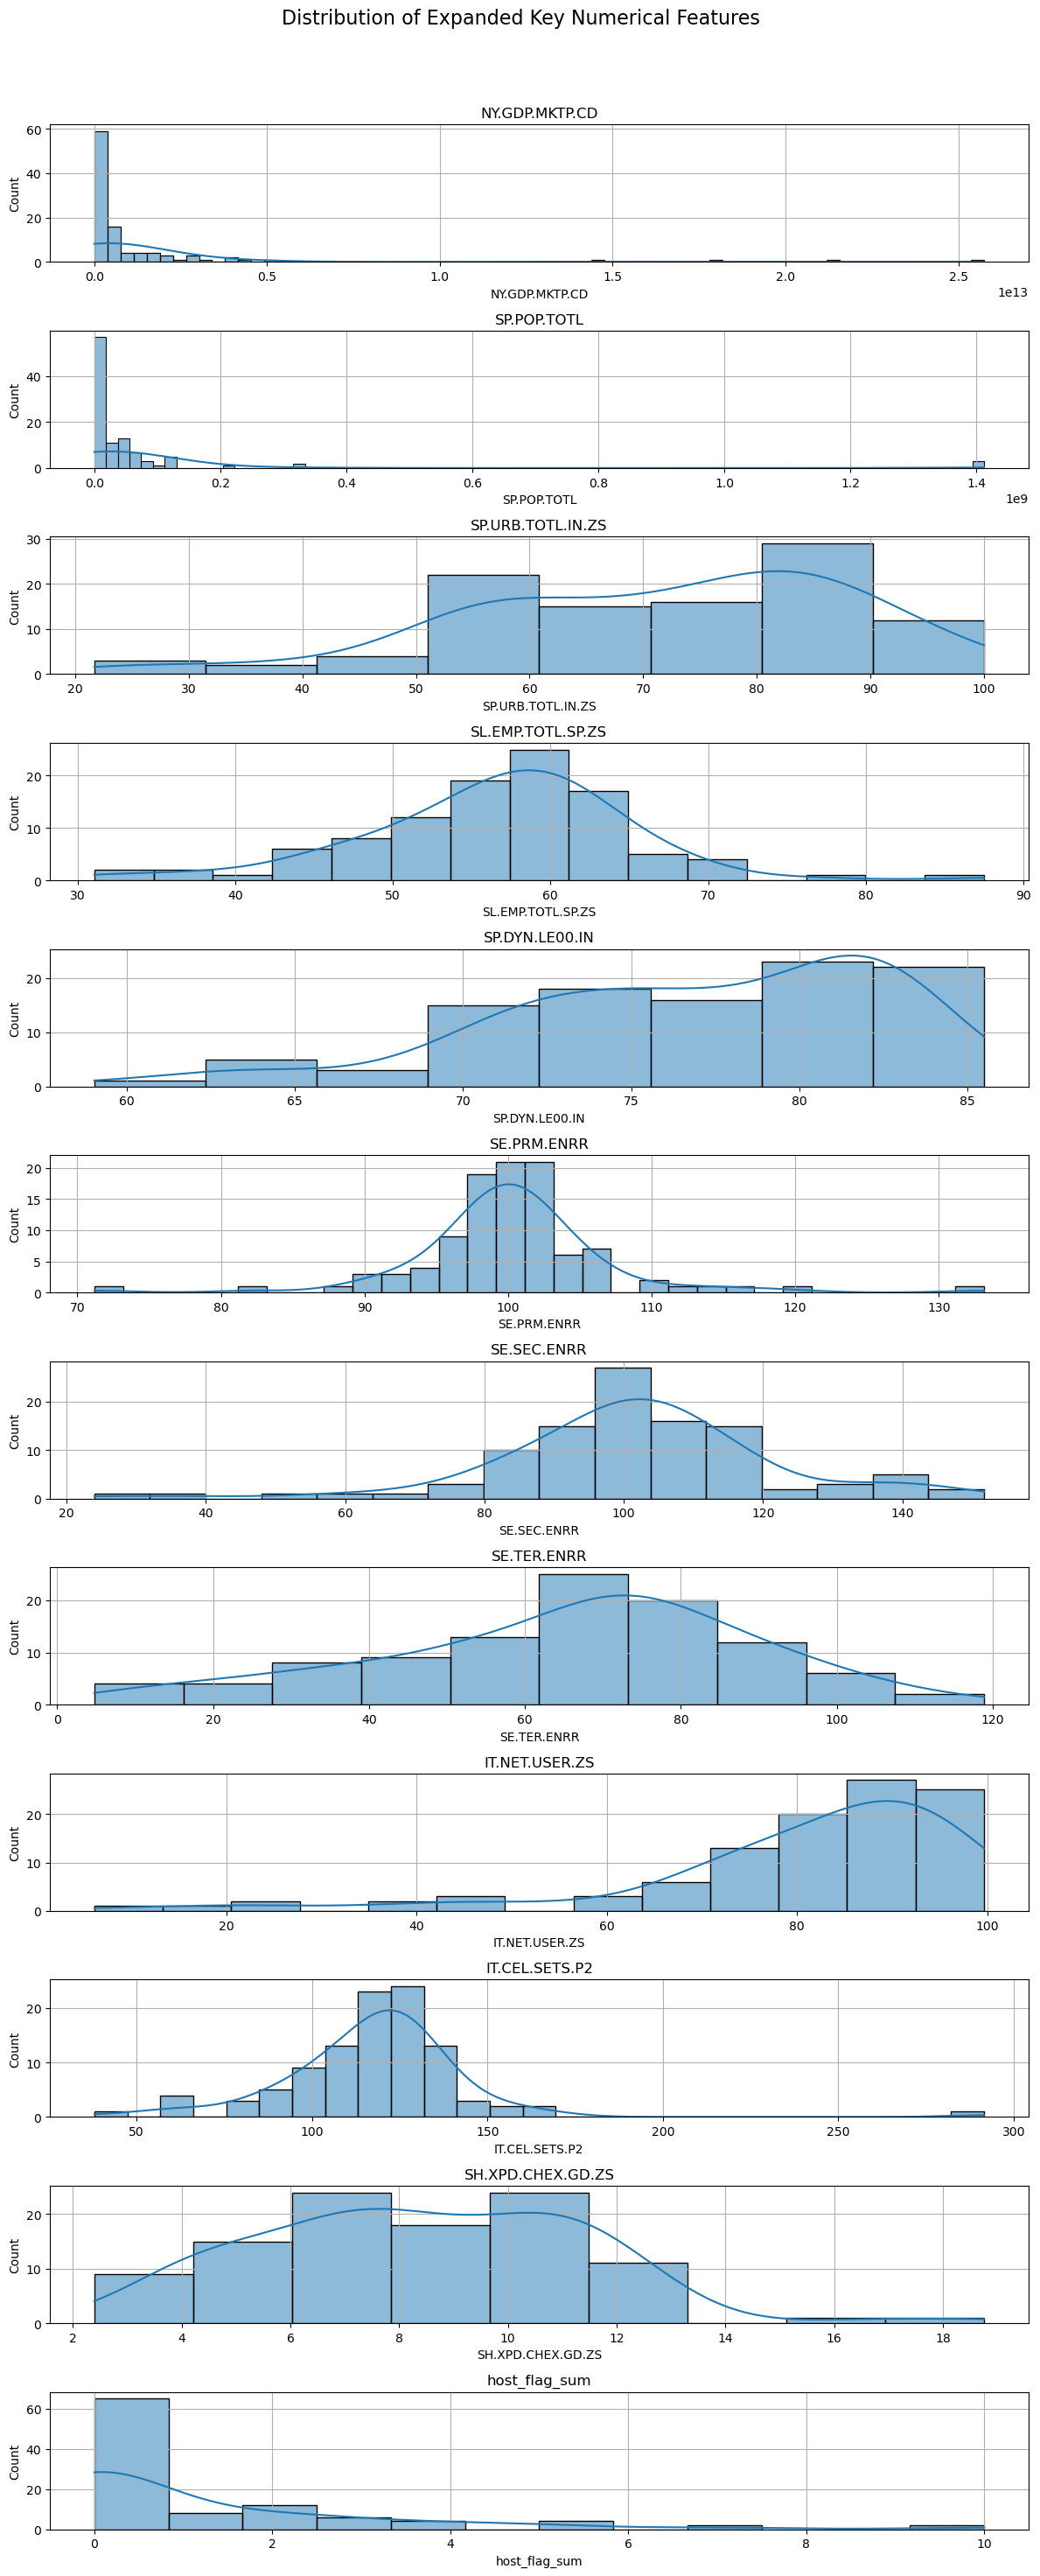

In [207]:
# Function to create histograms for numerical columns
def plot_histograms(df, columns, title):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(12, 30))
    fig.suptitle(title, fontsize=16)
    for i, col in enumerate(columns):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].grid(True)
        axes[i].set_title(col)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Expanded list of key numerical features for visualization
key_numerical_features = [
    'NY.GDP.MKTP.CD', 'SP.POP.TOTL', 'SP.URB.TOTL.IN.ZS', 
    'SL.EMP.TOTL.SP.ZS', 'SP.DYN.LE00.IN', 'SE.PRM.ENRR', 
    'SE.SEC.ENRR', 'SE.TER.ENRR', 'IT.NET.USER.ZS', 
    'IT.CEL.SETS.P2', 'SH.XPD.CHEX.GD.ZS','host_flag_sum'
]

# Plot histograms for the expanded list of key numerical features
plot_histograms(data, key_numerical_features, 'Distribution of Expanded Key Numerical Features')


In [208]:
data['medals_per_capita'] = data['total_medal'] / data['SP.POP.TOTL']
data['gdp_per_capita'] = data['NY.GDP.MKTP.CD'] / data['SP.POP.TOTL']
data['gdp_population_interaction'] = data['NY.GDP.MKTP.CD'] * data['SP.POP.TOTL']
data['urbanization_rate'] = data['SP.URB.TOTL.IN.ZS']
data['employment_to_population_ratio'] = data['SL.EMP.TOTL.SP.ZS']
data['life_expectancy'] = data['SP.DYN.LE00.IN']
data['primary_enrollment_ratio'] = data['SE.PRM.ENRR']
data['secondary_enrollment_ratio'] = data['SE.SEC.ENRR']
data['tertiary_enrollment_ratio'] = data['SE.TER.ENRR']
data['internet_penetration'] = data['IT.NET.USER.ZS']
data['mobile_penetration'] = data['IT.CEL.SETS.P2']
data['health_expenditure'] = data['SH.XPD.CHEX.GD.ZS']

/var/folders/mz/ry3t45m14wz2fbn7ln93113h0000gn/T/ipykernel_14820/3021846889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['medals_per_capita'] = data['total_medal'] / data['SP.POP.TOTL']
/var/folders/mz/ry3t45m14wz2fbn7ln93113h0000gn/T/ipykernel_14820/3021846889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gdp_per_capita'] = data['NY.GDP.MKTP.CD'] / data['SP.POP.TOTL']
/var/folders/mz/ry3t45m14wz2fbn7ln93113h0000gn/T/ipykernel_14820/3021846889.py:3: SettingWithCopyWarning: 
A value i

In [209]:
# One-hot encode the Income Group feature
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(data[['Income Group','host_flag']])
encoded_feature_names = encoder.get_feature_names_out(['Income Group','host_flag'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [210]:
enhanced_data = pd.concat([data, encoded_df], axis=1)
#enhanced_data.to_csv('../data/processed/data_final.csv',index=False)

In [211]:
enhanced_data.shape
display(enhanced_data.head())

,Year,Country,gold_medal,silver_medal,bronze_medal,total_medal,type_olympic,host_flag,Country_,gold_medal_sum,...,primary_enrollment_ratio,secondary_enrollment_ratio,tertiary_enrollment_ratio,internet_penetration,mobile_penetration,health_expenditure,Income Group_Low income,Income Group_Lower middle income,Income Group_Upper middle income,host_flag_1
0,2022.0,AUS,1.0,2.0,1.0,4.0,w,0.0,AUS,172.0,...,99.132988,133.277267,106.240761,96.240000,107.031203,10.543639,0.0,0.0,0.0,0.0
1,2022.0,AUT,7.0,7.0,4.0,18.0,w,0.0,AUT,92.0,...,100.775627,101.458000,93.940071,93.614091,123.434807,12.100000,0.0,0.0,0.0,0.0
2,2022.0,BEL,1.0,0.0,1.0,2.0,w,0.0,BEL,45.0,...,101.821136,143.163513,82.688202,94.007831,101.870773,11.042908,0.0,0.0,0.0,0.0
3,2022.0,BLR,0.0,2.0,0.0,2.0,w,0.0,BLR,23.0,...,94.711967,94.535896,70.867569,89.507331,123.447255,6.570000,0.0,0.0,1.0,0.0
4,2022.0,CAN,4.0,8.0,14.0,26.0,w,0.0,CAN,150.0,...,96.293083,109.334312,77.802292,92.834017,91.230625,11.154714,0.0,0.0,0.0,0.0


In [212]:
features = ['gold_medal', 'silver_medal', 'bronze_medal', 'NY.GDP.MKTP.CD', 
            'AG.LND.TOTL.K2', 'health_expenditure', 'gdp_population_interaction', 
            'SP.POP.TOTL', 'gdp_per_capita', 'SP.DYN.LE00.IN', 'tertiary_enrollment_ratio',
            'urbanization_rate', 'internet_penetration', 'employment_to_population_ratio',
            'gold_medal_mean', 'silver_medal_mean', 'bronze_medal_mean', 'total_medal_mean',
            'host_flag_sum', 'Income Group_Low income', 'Income Group_Lower middle income',
            'Income Group_Upper middle income', 'host_flag_1']

In [213]:
# Ensure all features are numeric and handle any remaining missing values
enhanced_data[features]= enhanced_data[features].apply(pd.to_numeric, errors='coerce')
enhanced_data.fillna(0, inplace=True)

# Cap extremely large values to a reasonable maximum
#max_value = 1e12
#enhanced_data[features] = enhanced_data[features].clip(lower=-max_value, upper=max_value)

# Replace infinite values with a large finite number
#enhanced_data.replace([np.inf, -np.inf], max_value, inplace=True)

In [214]:
enhanced_data.to_csv('../data/processed/data_final.csv',index=False)

In [215]:
enhanced_data.shape
display(enhanced_data.head())

,Year,Country,gold_medal,silver_medal,bronze_medal,total_medal,type_olympic,host_flag,Country_,gold_medal_sum,...,primary_enrollment_ratio,secondary_enrollment_ratio,tertiary_enrollment_ratio,internet_penetration,mobile_penetration,health_expenditure,Income Group_Low income,Income Group_Lower middle income,Income Group_Upper middle income,host_flag_1
0,2022.0,AUS,1.0,2.0,1.0,4.0,w,0.0,AUS,172.0,...,99.132988,133.277267,106.240761,96.240000,107.031203,10.543639,0.0,0.0,0.0,0.0
1,2022.0,AUT,7.0,7.0,4.0,18.0,w,0.0,AUT,92.0,...,100.775627,101.458000,93.940071,93.614091,123.434807,12.100000,0.0,0.0,0.0,0.0
2,2022.0,BEL,1.0,0.0,1.0,2.0,w,0.0,BEL,45.0,...,101.821136,143.163513,82.688202,94.007831,101.870773,11.042908,0.0,0.0,0.0,0.0
3,2022.0,BLR,0.0,2.0,0.0,2.0,w,0.0,BLR,23.0,...,94.711967,94.535896,70.867569,89.507331,123.447255,6.570000,0.0,0.0,1.0,0.0
4,2022.0,CAN,4.0,8.0,14.0,26.0,w,0.0,CAN,150.0,...,96.293083,109.334312,77.802292,92.834017,91.230625,11.154714,0.0,0.0,0.0,0.0
